In [203]:
import libkloudtrader.stocks as stocks
import libkloudtrader.analysis as analysis
import libkloudtrader.crypto as crypto
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [177]:
tsla=stocks.ohlcv('TSLA','2017-01-01','2019-08-19')
btc=crypto.ohlcv('BTC/USD','2017-01-01','2019-08-19')

In [178]:
tsla.head(10)

,open,high,low,close,volume
date,,,,,
2017-01-03,214.86,220.33,210.96,216.99,5923254
2017-01-04,214.75,228.00,214.31,226.99,11213471
2017-01-05,226.42,227.48,221.95,226.75,5911695
2017-01-06,226.93,230.31,225.45,229.01,5527893
2017-01-09,228.97,231.92,228.00,231.28,3979484
2017-01-10,232.00,232.00,226.89,229.87,3659955
2017-01-11,229.07,229.98,226.68,229.73,3650825
2017-01-12,229.06,230.70,225.58,229.59,3790229
2017-01-13,230.00,237.85,229.59,237.75,6092960


In [179]:
btc.tail(10)

,open,high,low,close,volume
time,,,,,
2019-08-10,11857.6,11975.0,11230.2,11284.7,4785.701597
2019-08-11,11284.7,11580.8,11101.9,11526.7,3095.213860
2019-08-12,11539.7,11550.2,11235.0,11384.2,2422.830947
2019-08-13,11384.2,11442.6,10751.0,10857.0,5152.202246
2019-08-14,10857.0,10862.0,9900.0,10018.0,8750.106545
2019-08-15,10018.0,10450.0,9490.0,10304.5,11020.827736
2019-08-16,10300.9,10535.0,9728.0,10362.1,8055.277715
2019-08-17,10362.1,10475.0,9999.9,10211.8,3615.522778
2019-08-18,10211.8,10502.4,10069.3,10326.4,2764.388923


Text(0.5, 1.0, 'TSLA close price')

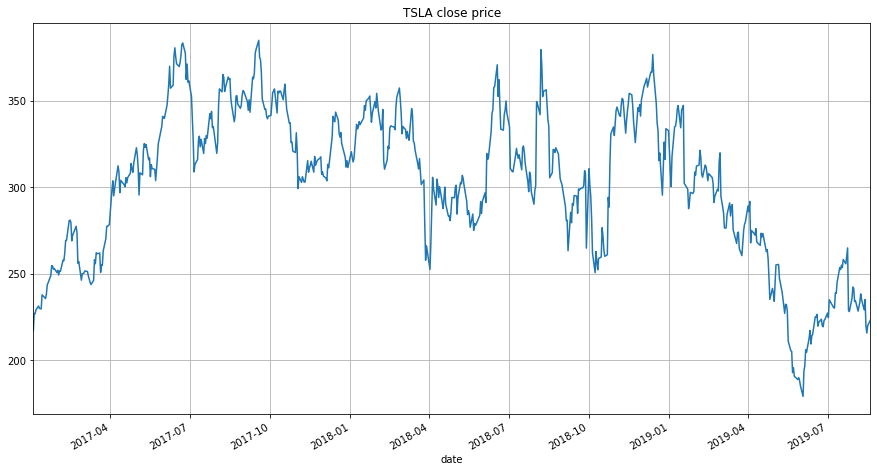

In [180]:
tsla['close'].plot(figsize=(15,8),grid=True)
plt.title('TSLA close price')

Text(0.5, 1.0, 'BTC close price')

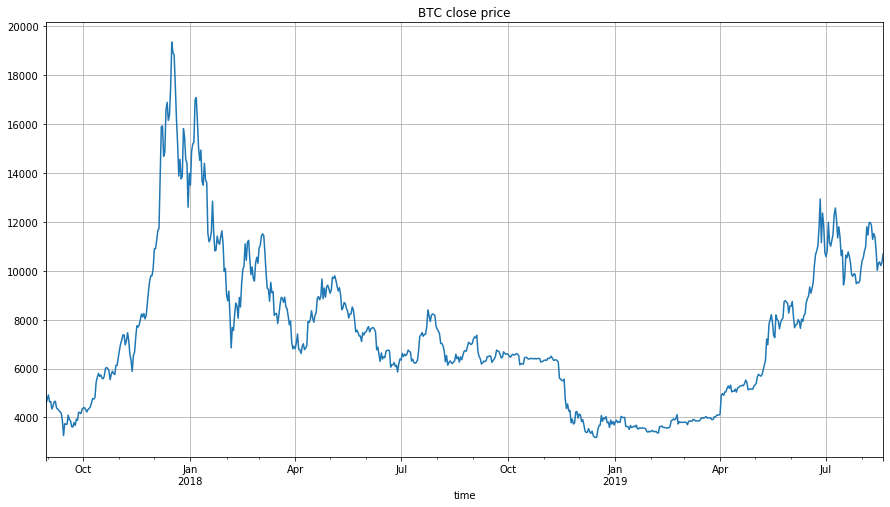

In [181]:
btc['close'].plot(figsize=(15,8),grid=True)
plt.title('BTC close price')

In [182]:
short_window=40
long_window=100

tsla_signals=pd.DataFrame(index=tsla.index)
tsla_signals['signal']=0.0
tsla_signals['short_mavg']=analysis.sma(tsla['close'],short_window)
tsla_signals['long_mavg']=analysis.sma(tsla['close'],long_window)
tsla_signals['signal'][short_window:]=np.where(tsla_signals['short_mavg'][short_window:]
                                               >tsla_signals['long_mavg'][short_window:],1,0)
tsla_signals['positions']=tsla_signals['signal'].diff()
print(tsla_signals.loc[tsla_signals['positions']==1.0])
print(tsla_signals.loc[tsla_signals['positions']==-1.0])

            signal  short_mavg  long_mavg  positions
date                                                
2017-05-25  1.0     307.72275   274.8721   1.0      
2018-02-05  1.0     334.11275   333.7743   1.0      
2018-06-28  1.0     312.00850   311.5592   1.0      
2018-11-28  1.0     312.14675   311.9730   1.0      
            signal  short_mavg  long_mavg  positions
date                                                
2017-11-06  0.0     346.554000  347.04970 -1.0      
2018-04-02  0.0     322.966125  324.22565 -1.0      
2018-09-28  0.0     312.009000  313.22220 -1.0      
2019-02-13  0.0     318.900750  319.05465 -1.0      


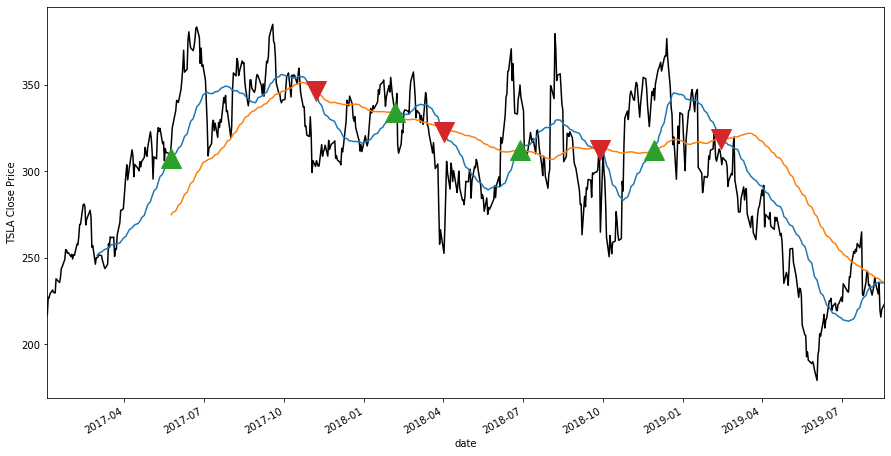

In [183]:
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(111,ylabel='TSLA Close Price')
tsla['close'].plot(ax=ax1,color='black')
tsla_signals['short_mavg'].plot(ax=ax1)
tsla_signals['long_mavg'].plot(ax=ax1)
ax1.plot(tsla_signals.loc[tsla_signals['positions']==1.0].index,tsla_signals.short_mavg[tsla_signals.positions==1.0],'^',markersize=20)
ax1.plot(tsla_signals.loc[tsla_signals['positions']==-1.0].index,tsla_signals.short_mavg[tsla_signals.positions==-1.0],'v',markersize=20)

In [184]:
short_window=40
long_window=100

btc_signals=pd.DataFrame(index=btc.index)
btc_signals['signal']=0.0
btc_signals['short_mavg']=analysis.sma(btc['close'],short_window)
btc_signals['long_mavg']=analysis.sma(btc['close'],long_window)
btc_signals['signal'][short_window:]=np.where(btc_signals['short_mavg'][short_window:]
                                               >btc_signals['long_mavg'][short_window:],1,0)
btc_signals['positions']=btc_signals['signal'].diff()
print(btc_signals.loc[btc_signals['positions']==1.0])
print(btc_signals.loc[btc_signals['positions']==-1.0])

            signal  short_mavg  long_mavg  positions
time                                                
2017-12-07  1.0     8437.5925   6173.513   1.0      
2018-08-22  1.0     7041.5650   7019.857   1.0      
2019-03-09  1.0     3678.0250   3677.529   1.0      
            signal  short_mavg  long_mavg  positions
time                                                
2018-02-11  0.0     11607.2350  11685.074 -1.0      
2018-09-05  0.0     6878.5925   6889.108  -1.0      


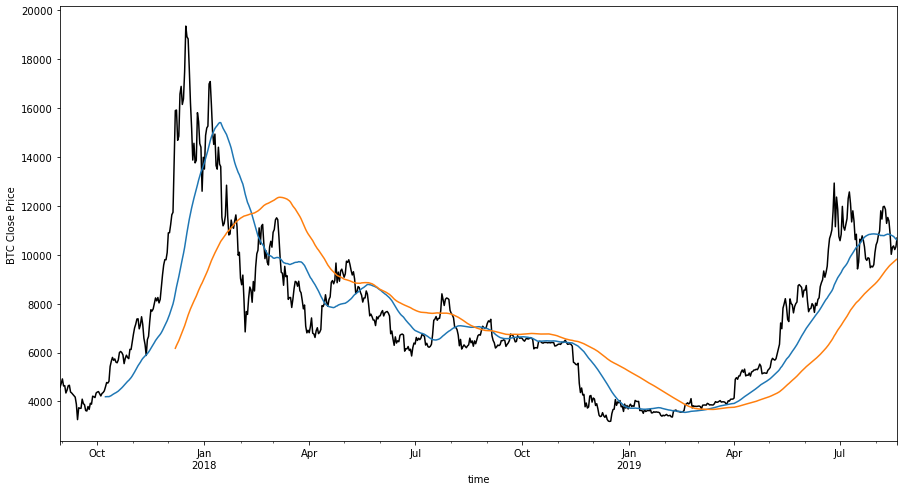

In [185]:
fig2=plt.figure(figsize=(15,8))
ax2=fig2.add_subplot(111,ylabel='BTC Close Price')
btc['close'].plot(ax=ax2,color='black')
btc_signals['short_mavg'].plot(ax=ax2)
btc_signals['long_mavg'].plot(ax=ax2)
ax2.plot(btc_signals.loc[btc_signals['positions']==1.0].index,btc_signals.short_mavg[btc_signals.positions==1.0],'^',markersize=20,)
ax2.plot(btc_signals.loc[btc_signals['positions']==-1.0].index,btc_signals.short_mavg[btc_signals.positions==-1.0],'v',markersize=20)
plt.show()

In [206]:
initial_capital=float(100000)
tsla_positions=pd.DataFrame(index=tsla_signals.index).fillna(0.0)
tsla_positions['Positions in TSLA']=1000*tsla_signals['signal']
portfolio=tsla_positions.multiply(tsla['close'],axis=0)
pos_diff=tsla_positions.diff()
portfolio['holdings']=(positions.multiply(tsla['close'],axis=0).sum(axis=1))

,Positions in TSLA
date,
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0
2017-01-06,0.0
2017-01-09,0.0
2017-01-10,0.0
2017-01-11,0.0
2017-01-12,0.0
2017-01-13,0.0
